# Datasets used:
https://www.kaggle.com/datasets/jamiewelsh2/ball-by-ball-ipl

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

t20_data = pd.read_csv("datasets/cricket/ball_by_ball_ipl.csv")

In [12]:
print(t20_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239693 entries, 0 to 239692
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Unnamed: 0               239693 non-null  int64         
 1   Match ID                 239693 non-null  int64         
 2   Date                     239693 non-null  datetime64[ns]
 3   Venue                    239693 non-null  object        
 4   Bat First                239693 non-null  object        
 5   Bat Second               239693 non-null  object        
 6   Innings                  239693 non-null  int64         
 7   Over                     239693 non-null  int64         
 8   Ball                     239693 non-null  int64         
 9   Batter                   239693 non-null  object        
 10  Non Striker              239693 non-null  object        
 11  Bowler                   239693 non-null  object        
 12  Batter Runs     

In [2]:
t20_data["Bowler Runs Conceded"].value_counts()

Bowler Runs Conceded
1    96033
0    87959
4    27095
2    15690
6    11518
3      849
5      472
7       77
Name: count, dtype: int64

### Methods of Dismissal

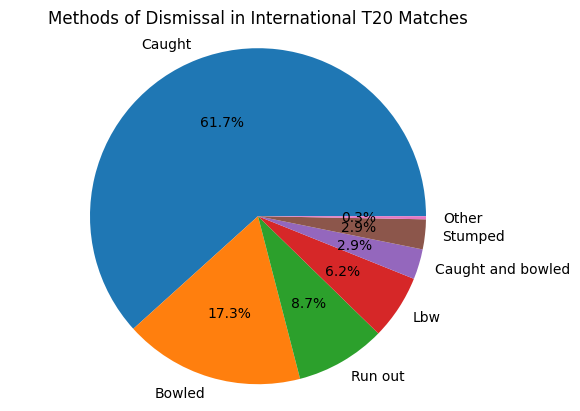

In [3]:
# Filter data frame to get rid of N/A values in the method column.
filtered_df = t20_data[t20_data["Method"] != "N/A"]
# Count values in filtered data frame.
value_counts = filtered_df["Method"].value_counts()
# Set the minimum occurrence count for displaying a slice.
threshold = 50
# Filter out the methods with occurrence count below the threshold.
filtered_value_counts = value_counts[value_counts >= threshold]
# Create a custom "Other" category to group rare methods below the threshold.
other_count = value_counts[value_counts < threshold].sum()
filtered_value_counts["other"] = other_count
# Capitalize the first letter of each label using str.capitalize().
labels = filtered_value_counts.index.str.capitalize()
# Plot the pie chart with the filtered value counts.
plt.pie(filtered_value_counts, labels=labels, autopct="%.1f%%")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Methods of Dismissal in International T20 Matches")
plt.show()

### Runs and Wickets per Over

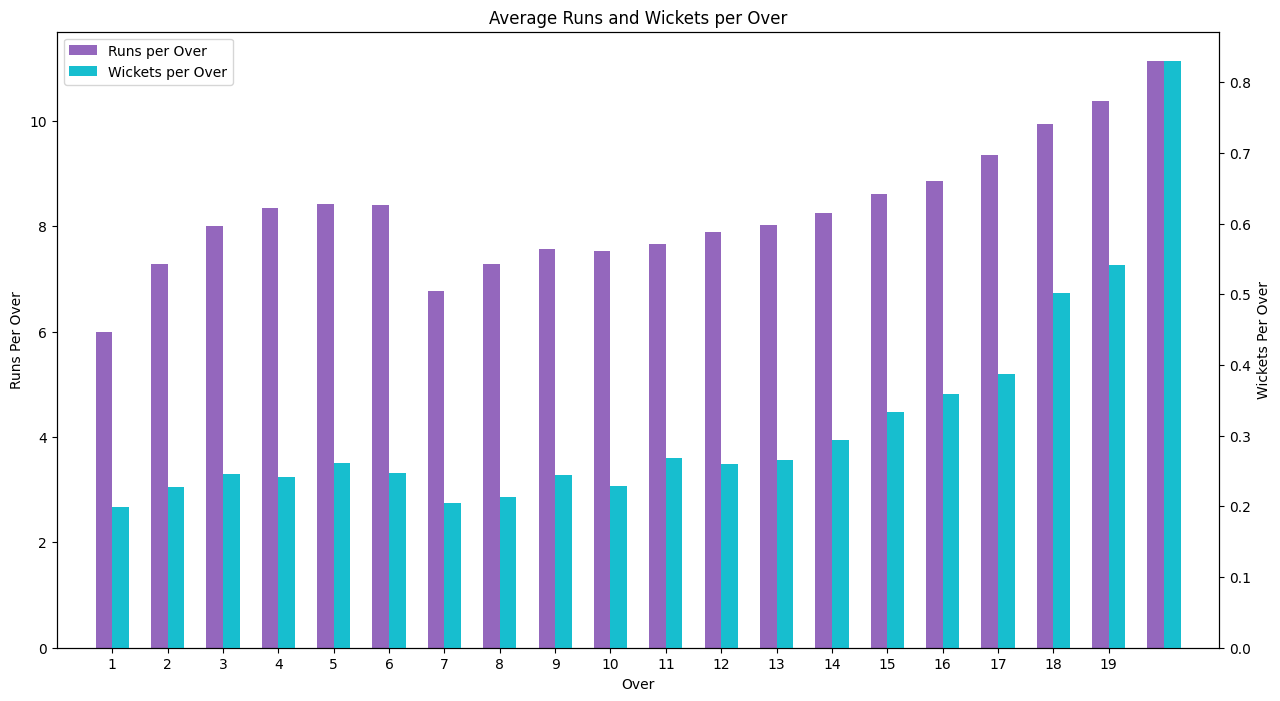

In [4]:
overs = list(np.arange(1, 21))
Rpo = []
Wpo = []
for over in overs:
    over_df = t20_data.loc[t20_data["Over"] == over]
    total_balls = len(over_df[over_df["Ball Rebowled"] == 0].index)
    avg_wick_pb = over_df["Wicket"].sum() / (total_balls)
    avg_pb = over_df["Runs From Ball"].sum() / (total_balls)
    Wpo.append(avg_wick_pb * 6)
    Rpo.append(avg_pb * 6)
# Create a figure and axis object.
fig, ax = plt.subplots(figsize=(15, 8))
# Set the x-axis label.
ax.set_xlabel("Over")
# Set the y-axis label for the first field.
ax.set_ylabel("Runs Per Over", color="k")
# Create the bar chart for the first field.
ax.bar(
    np.array(overs) - 0.15,
    Rpo,
    color="tab:purple",
    label="Runs per Over",
    width=0.3,
)
# Create a second y-axis object.
ax2 = ax.twinx()
# Set the y-axis label for the second field.
ax2.set_ylabel("Wickets Per Over", color="k")
# Create the bar chart for the second field.
ax2.bar(
    np.array(overs) + 0.15,
    Wpo,
    color="tab:cyan",
    label="Wickets per Over",
    width=0.3,
)
# Set the x-axis limits to ensure all bars are visible.
ax.set_xlim([0, 21])
# create the legend.
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper left")
plt.xticks(np.arange(1, 20, step=1))
# Show the plot.
plt.title("Average Runs and Wickets per Over")
plt.show()

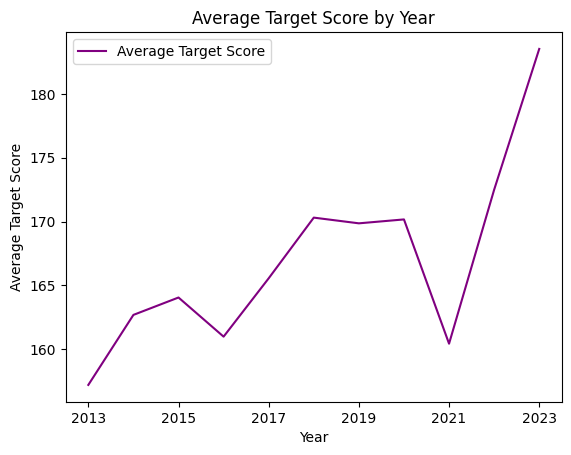

In [5]:
years = [
    "2013",
    "2014",
    "2015",
    "2016",
    "2017",
    "2018",
    "2019",
    "2020",
    "2021",
    "2022",
    "2023",
]
year_targets = []
for year in years:
    targets = []
    year_df = t20_data[t20_data["Date"].str.slice(stop=4) == year]
    for j in range(len(year_df.index) - 1):
        if year_df["Match ID"].iloc[j] != year_df["Match ID"].iloc[j + 1]:
            targets.append(year_df["Target Score"].iloc[j])
    year_targets.append(sum(targets) / len(targets))
df = pd.DataFrame({"Average Target Score": year_targets}, index=years)
# Plot the data against years.
df.plot(kind="line", color="purple")
# Set the title and axis labels.
plt.title("Average Target Score by Year")
plt.xlabel("Year")
plt.ylabel("Average Target Score")
# Show the plot.
plt.show()

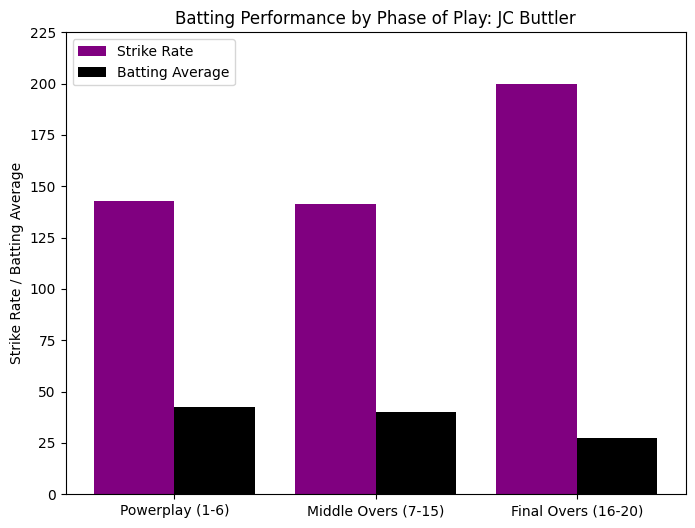

In [6]:
powerplay_df = t20_data.loc[(t20_data["Over"] >= 1) & (t20_data["Over"] <= 6)]
middle_df = t20_data.loc[(t20_data["Over"] >= 7) & (t20_data["Over"] <= 15)]
end_df = t20_data.loc[(t20_data["Over"] >= 16) & (t20_data["Over"] <= 20)]

player = "JC Buttler"
dfs = [powerplay_df, middle_df, end_df]
AVGs = []
SRs = []
BASRAs = []
for df in dfs:
    player_mask = df["Batter"] == player
    batter_df = df.loc[player_mask]
    n_outs = len(df[df["Player Out"] == player].index)
    total_runs = sum(batter_df["Batter Runs"])
    total_bf = len(batter_df[batter_df["Ball Rebowled"] == 0].index)
    bat_avg = total_runs / n_outs
    sr = (total_runs / total_bf) * 100
    basra = bat_avg + sr
    AVGs.append(bat_avg)
    SRs.append(sr)
    BASRAs.append(basra)
# Example data.
stages = ["Powerplay (1-6)", "Middle Overs (7-15)", "Final Overs (16-20)"]
# Set up the plot.
fig, ax = plt.subplots(figsize=(8, 6))
# Set the x-axis labels and positions.
x_labels = stages
x_positions = np.arange(len(x_labels))
ax.bar(x_positions, SRs, width=0.4, label="Strike Rate", color="purple")
# Plot the batting average bars.
ax.bar(x_positions + 0.4, AVGs, width=0.4, label="Batting Average", color="black")
# Set the y-axis limits and labels.
ax.set_ylim([0, 225])
ax.set_ylabel("Strike Rate / Batting Average")
# Set the title and legend.
ax.set_title("Batting Performance by Phase of Play: JC Buttler")
ax.legend()
# Add the x-axis labels and tick marks.
ax.set_xticks(x_positions + 0.2)
ax.set_xticklabels(x_labels)
plt.show()

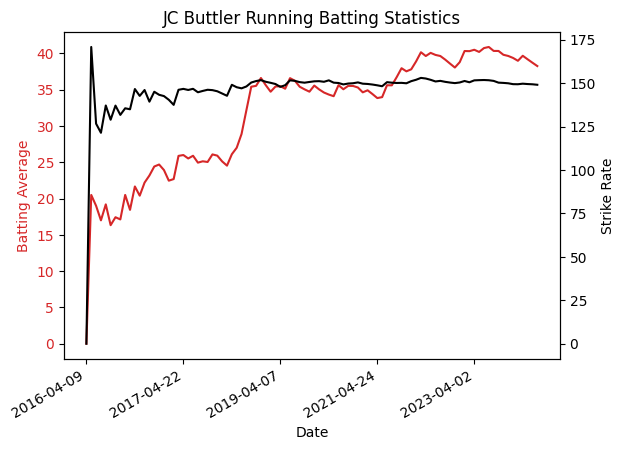

In [7]:
player = "JC Buttler"

# Slice the data frame by when player is at the crease.
player_df = t20_data[
    (t20_data["Batter"] == player) | (t20_data["Non Striker"] == player)
]
# Get a list of unique dates in date_col.
unique_dates = player_df["Date"].unique()
# Sort the unique dates in ascending order.
unique_dates_sorted = sorted(unique_dates)
player_data = []
n_outs = 0
total_runs = 0
total_bf = 0
for date in unique_dates_sorted:
    game_df = player_df[player_df["Date"] == date]
    batter_df = game_df[game_df["Batter"] == player]
    runs = batter_df["Batter Runs"].sum()
    # Check if any value in 'Player Out' column is equal to player.
    if player in game_df["Player Out"].values:
        n_outs += 1
    bf = len(batter_df[batter_df["Ball Rebowled"] == 0].index)
    total_runs += runs
    total_bf += bf
    player_data.append(
        [player, date, total_runs / n_outs, (total_runs / total_bf) * 100]
    )
player_data_df = pd.DataFrame(
    player_data, columns=["Player", "Date", "Batting Average", "Strike Rate"]
)
# Set up the plot.
fig, ax1 = plt.subplots()
# Plot the first data set on the left y-axis.
color = "tab:red"
ax1.set_xlabel("Date")
ax1.set_ylabel("Batting Average", color=color)
ax1.plot(player_data_df["Date"], player_data_df["Batting Average"], color=color)
ax1.tick_params(axis="y", labelcolor=color)
# Create a second y-axis on the right side of the plot.
ax2 = ax1.twinx()
# Plot the second data set on the right y-axis.
color = "k"
ax2.set_ylabel("Strike Rate", color=color)
ax2.plot(player_data_df["Date"], player_data_df["Strike Rate"], color=color)
ax2.tick_params(axis="y", labelcolor=color)
# Set the tick frequency on the x-axis.
ax1.xaxis.set_major_locator(plt.MaxNLocator(6))
# Display legend.
ax.legend()
# Format the dates on the x-axis.
fig.autofmt_xdate()
plt.title("JC Buttler Running Batting Statistics")
# Show the plot.
plt.show()

/tmp/ipykernel_1425/3779576805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_df['Date'] = pd.to_datetime(middle_df['Date'])


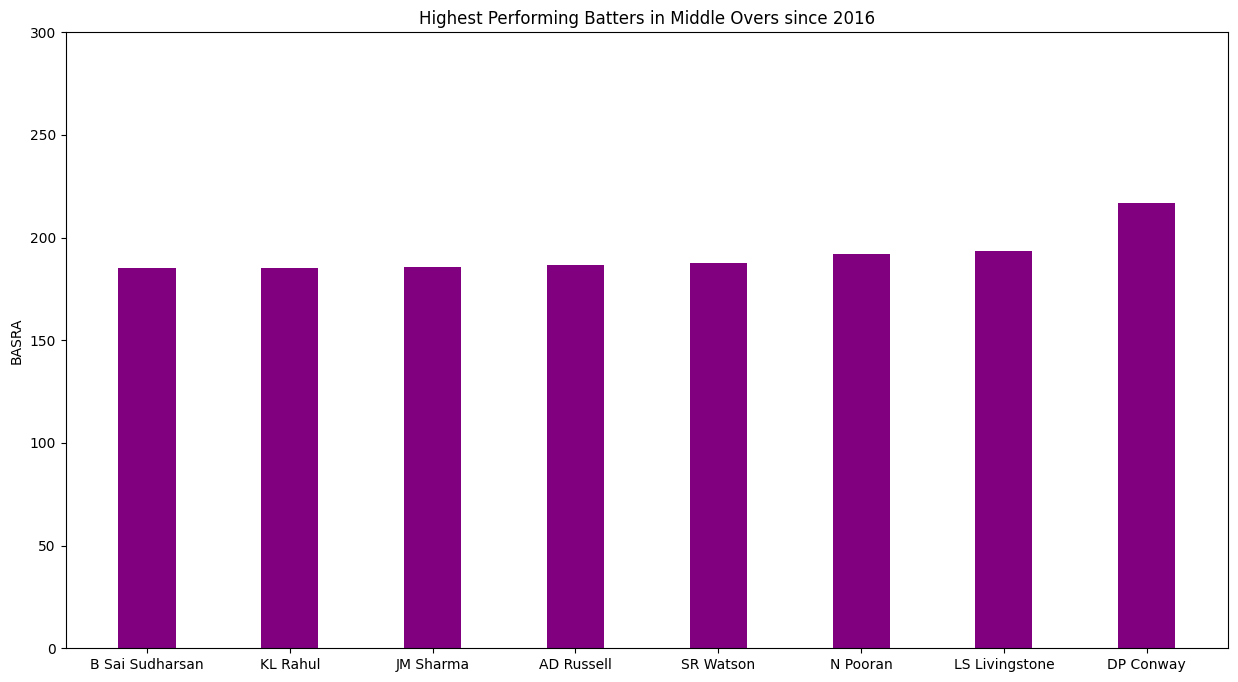

In [8]:
# Convert the "date" column to datetime format.
middle_df["Date"] = pd.to_datetime(middle_df["Date"])
# Slice the dataframe by values in the "date" column after the year 2015.
middle_df = middle_df[middle_df["Date"].dt.year > 2015]
# Get list of batters that have been at the crease during the middle overs in this period.
batter_list = middle_df["Batter"].unique().tolist()
BATTER = []
BASRA = []
BASRA2 = []
for batter in batter_list:
    batter_df = middle_df.loc[middle_df["Batter"] == batter]
    if len(batter_df.index) > 200:
        BATTER.append(batter)
        n_outs = len(middle_df[middle_df["Player Out"] == batter].index)
        total_runs = sum(batter_df["Batter Runs"])
        total_bf = len(batter_df[batter_df["Ball Rebowled"] == 0].index)
        bat_avg = total_runs / n_outs
        sr = (total_runs / total_bf) * 100
        BASRA.append(bat_avg + sr)
        BASRA2.append(2 * bat_avg + sr)
# convert the list to a numpy array.
BASRA = np.array(BASRA)
# get the indices of the 8 max values.
max_indices = np.argsort(BASRA)[-8:]
max_batters = [BATTER[i] for i in max_indices]
max_BASRAs = [BASRA[i] for i in max_indices]
fig, ax = plt.subplots(figsize=(15, 8))
x_labels = max_batters
x_positions = np.arange(len(x_labels))
ax.bar(
    x_positions, max_BASRAs, width=0.4, label="BASRA", color="purple"
)  # Set the y-axis limits and labels.
ax.set_ylim([0, 300])
ax.set_ylabel("BASRA")
# Add the x-axis labels and tick marks.
ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels)
# Set the title and legend.
ax.set_title("Highest Performing Batters in Middle Overs since 2016")
plt.show()

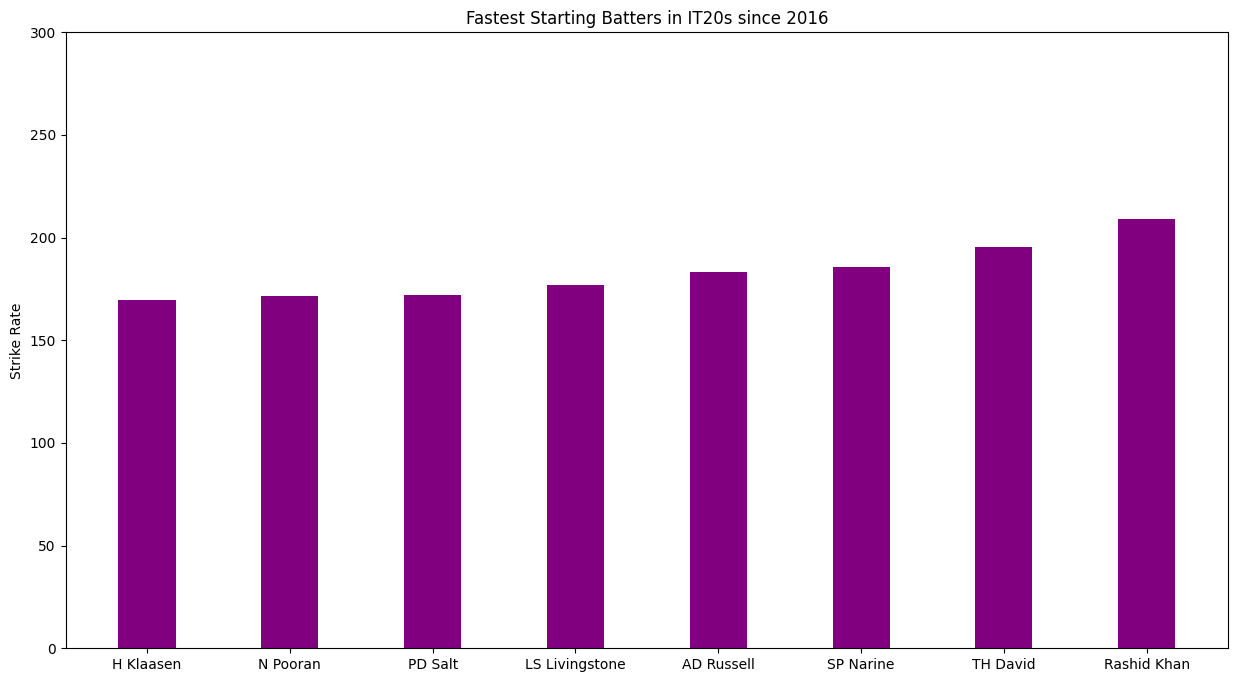

In [9]:
t20_data["Date"] = pd.to_datetime(t20_data["Date"])
starts = t20_data[t20_data["Date"].dt.year > 2015]
starts.loc[:, "Valid Ball"] = (starts["Ball Rebowled"] != 1).astype(int)
batter_list = starts["Batter"].unique().tolist()
SRs = []
batters = []
for batter in batter_list:
    batter_df = starts.loc[starts["Batter"] == batter]
    ids = batter_df["Match ID"].unique()
    first10 = []
    for match_id in ids:
        game_df = batter_df[batter_df["Match ID"] == match_id]
        cum_sum = 0
        index_to_stop = 0
        for index, row in game_df.iterrows():
            cum_sum += row["Valid Ball"]
            if cum_sum >= 10:
                index_to_stop = index + 1
                break
        game_df = game_df.iloc[:index_to_stop]
        first10.append(game_df)
    first10 = pd.concat(first10, axis=0)
    if len(first10.index) > 100:
        batters.append(batter)
        SRs.append(
            (
                first10["Batter Runs"].sum()
                / len(first10[first10["Ball Rebowled"] == 0].index)
            )
            * 100
        )
# convert the list to a numpy array.
SRs = np.array(SRs)
# get the indices of the 8 max values.
max_indices = np.argsort(SRs)[-8:]
max_batters = [batters[i] for i in max_indices]
max_SRs = [SRs[i] for i in max_indices]
fig, ax = plt.subplots(figsize=(15, 8))
x_labels = max_batters
x_positions = np.arange(len(x_labels))
ax.bar(
    x_positions,
    max_SRs,
    width=0.4,
    label="First 10 Balls of Innings Strike Rate",
    color="purple",
)
# Set the y-axis limits and labels.
ax.set_ylim([0, 300])
ax.set_ylabel("Strike Rate")
# Add the x-axis labels and tick marks.
ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels)
# Set the title and legend.
ax.set_title("Fastest Starting Batters in IT20s since 2016")
plt.show()